#### Data Import

In [1]:
import pandas as pd

# Import the cleaned data
df_cleaned = pd.read_csv('C:/Users/mahmu/Downloads/DataAnalyticsProjects/Employee Retention Analysis/cleaned_data.csv')

df_cleaned.head()

,id,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,...,ceo_approv,outlook,headline,pros,cons,company_size,sentimental_score,review_year,review_month,experience_level
0,1,AFH-Wealth-Management,2015-04-05,,Current Employee,unknown,2.0,4.0,3.0,4,...,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication.",Mid-Size,1.0,2015,4,Mid-level
1,2,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2.0,3.0,1.0,4,...,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...,Mid-Size,-1.0,2015,12,Entry
2,3,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1.0,1.0,1.0,4,...,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very...",Mid-Size,-1.0,2016,1,Entry
3,4,AFH-Wealth-Management,2016-04-16,,Current Employee,unknown,5.0,2.0,3.0,4,...,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor,Mid-Size,-1.0,2016,4,Mid-level
4,5,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1.0,2.0,1.0,4,...,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr...",Mid-Size,-1.0,2016,4,Entry


In [2]:
# All Columns
df_cleaned.columns

Index(['id', 'firm', 'date_review', 'job_title', 'current', 'location',
       'overall_rating', 'work_life_balance', 'culture_values',
       'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt',
       'recommend', 'ceo_approv', 'outlook', 'headline', 'pros', 'cons',
       'company_size', 'sentimental_score', 'review_year', 'review_month',
       'experience_level'],
      dtype='object')

In [3]:
## Remove sentimental_score Column
# Remove the old sentimental_score column if it exists
if 'sentimental_score' in df_cleaned.columns:
    df_cleaned = df_cleaned.drop('sentimental_score', axis=1)
df_cleaned.head()

,id,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,...,recommend,ceo_approv,outlook,headline,pros,cons,company_size,review_year,review_month,experience_level
0,1,AFH-Wealth-Management,2015-04-05,,Current Employee,unknown,2.0,4.0,3.0,4,...,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication.",Mid-Size,2015,4,Mid-level
1,2,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2.0,3.0,1.0,4,...,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...,Mid-Size,2015,12,Entry
2,3,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1.0,1.0,1.0,4,...,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very...",Mid-Size,2016,1,Entry
3,4,AFH-Wealth-Management,2016-04-16,,Current Employee,unknown,5.0,2.0,3.0,4,...,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor,Mid-Size,2016,4,Mid-level
4,5,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1.0,2.0,1.0,4,...,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr...",Mid-Size,2016,4,Entry


#### NLP for Sentimental Score

In [4]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import numpy as np
import pandas as pd

nltk.download('vader_lexicon')

# --- Sentiment functions ---
sid = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    """Returns compound sentiment score in range [-1, 1]."""
    return sid.polarity_scores(str(text))['compound']

def get_textblob_sentiment(text):
    """Returns polarity score in range [-1, 1]."""
    return TextBlob(str(text)).sentiment.polarity

# --- Apply to both Pros and Cons ---
df_cleaned['pros_sentiment'] = df_cleaned['pros'].apply(get_vader_sentiment)
df_cleaned['cons_sentiment'] = df_cleaned['cons'].apply(get_textblob_sentiment)

# --- Normalize and Combine ---
# Here, we combine the two in a meaningful way:
# Positive sentiment (pros) increases the score, negative sentiment (cons) decreases it.
# We also rescale to [0, 1] for model stability.

df_cleaned['sentimental_score'] = (
    (df_cleaned['pros_sentiment'] - df_cleaned['cons_sentiment'])
).clip(-1, 1)  # ensure within range

# Optional normalization to 0–1 scale
df_cleaned['sentimental_score'] = (df_cleaned['sentimental_score'] + 1) / 2

# --- Quick sanity check ---
print(df_cleaned['sentimental_score'].describe())
print(df_cleaned[['pros_sentiment', 'cons_sentiment', 'sentimental_score']].head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mahmu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


count    769608.000000
mean          0.790271
std           0.183612
min           0.000000
25%           0.690900
50%           0.832205
75%           0.934950
max           1.000000
Name: sentimental_score, dtype: float64
   pros_sentiment  cons_sentiment  sentimental_score
0          0.8610       -0.400000           1.000000
1          0.7184       -0.108000           0.913200
2          0.4404       -0.104821           0.772611
3          0.4215       -0.400000           0.910750
4          0.6908       -0.233333           0.962067


In [5]:
df_cleaned.to_csv("cleaned_with_sentiment.csv", index=False)

In [7]:
# values from current column 
df_cleaned['current'].value_counts()

current
Current Employee                           180956
Former Employee                            126248
Current Employee, more than 1 year          79126
Current Employee, more than 3 years         63450
Former Employee, more than 1 year           63347
Current Employee, less than 1 year          47717
Former Employee, more than 3 years          41806
Former Employee, less than 1 year           40709
Current Employee, more than 5 years         38202
Current Employee, more than 10 years        23520
Former Employee, more than 5 years          22046
Current Employee, more than 8 years         17639
Former Employee, more than 10 years         14580
Former Employee, more than 8 years          10231
Former Contractor, less than 1 year             6
Former Intern, less than 1 year                 4
Current Contractor, less than 1 year            3
Current Contractor, more than 1 year            3
Former Contractor                               2
Current Contractor                        

#### Reviewer Status Column

In [8]:
import numpy as np

# Create reviewer_status column
df_cleaned['reviewer_status'] = np.where(
    df_cleaned['current'].str.contains('Former', case=False, na=False), 'Former Employee', 'Current Employee'
)

# value count of reviewer_status column
df_cleaned['reviewer_status'].value_counts()

reviewer_status
Current Employee    450620
Former Employee     318988
Name: count, dtype: int64

The 'reviewer_status' column is created to separate Current and Former employees so that the Retention Label can be separated. 

#### Attrition Label column creation

In [9]:
df_cleaned['reviewer_status'] = df_cleaned['current'].str.lower()

df_cleaned['attrition_label'] = np.where(
    df_cleaned['reviewer_status'].str.contains('former'), 1, 0
)

In [11]:
# Grouped by attrition_label
df_cleaned['attrition_label'].value_counts()

attrition_label
0    450620
1    318988
Name: count, dtype: int64

In [12]:
df_cleaned.columns

Index(['id', 'firm', 'date_review', 'job_title', 'current', 'location',
       'overall_rating', 'work_life_balance', 'culture_values',
       'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt',
       'recommend', 'ceo_approv', 'outlook', 'headline', 'pros', 'cons',
       'company_size', 'review_year', 'review_month', 'experience_level',
       'pros_sentiment', 'cons_sentiment', 'sentimental_score',
       'reviewer_status', 'attrition_label'],
      dtype='object')

In [16]:
# Select important columns for modeling
df = df_cleaned[[
    'overall_rating', 
    'work_life_balance', 
    'career_opp', 
    'comp_benefits', 
    'senior_mgmt', 
    'pros_sentiment', 
    'cons_sentiment', 
    'sentimental_score', 
    'company_size', 
    'experience_level', 
    'review_year', 
    'review_month', 
    'attrition_label'
]]

# Quick check
print(df.shape)
df.head()

(769608, 13)


,overall_rating,work_life_balance,career_opp,comp_benefits,senior_mgmt,pros_sentiment,cons_sentiment,sentimental_score,company_size,experience_level,review_year,review_month,attrition_label
0,2.0,4.0,2.0,3.0,3.0,0.8610,-0.400000,1.000000,Mid-Size,Mid-level,2015,4,0
1,2.0,3.0,2.0,1.0,4.0,0.7184,-0.108000,0.913200,Mid-Size,Entry,2015,12,0
2,1.0,1.0,1.0,1.0,1.0,0.4404,-0.104821,0.772611,Mid-Size,Entry,2016,1,0
3,5.0,2.0,2.0,2.0,3.0,0.4215,-0.400000,0.910750,Mid-Size,Mid-level,2016,4,0
4,1.0,2.0,2.0,1.0,1.0,0.6908,-0.233333,0.962067,Mid-Size,Entry,2016,4,0


Keeping only the necessary columns for feature engineering and modeling. 

In [17]:
df.columns

Index(['overall_rating', 'work_life_balance', 'career_opp', 'comp_benefits',
       'senior_mgmt', 'pros_sentiment', 'cons_sentiment', 'sentimental_score',
       'company_size', 'experience_level', 'review_year', 'review_month',
       'attrition_label'],
      dtype='object')

#### Feature Engineering & Encoding

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# --- 1️⃣ Label Encoding for Categorical Variables ---
label_encoders = {}

for col in ['company_size', 'experience_level']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# --- 2️⃣ Define Features and Target ---
X = df.drop('attrition_label', axis=1)
y = df['attrition_label']

# --- 3️⃣ Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 4️⃣ Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))

C:\Users\mahmu\AppData\Local\Temp\ipykernel_16720\562268533.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\mahmu\AppData\Local\Temp\ipykernel_16720\562268533.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])


X_train_scaled shape: (615686, 12)
y_train distribution:
 attrition_label
0    0.585519
1    0.414481
Name: proportion, dtype: float64


In [21]:
df.columns

Index(['overall_rating', 'work_life_balance', 'career_opp', 'comp_benefits',
       'senior_mgmt', 'pros_sentiment', 'cons_sentiment', 'sentimental_score',
       'company_size', 'experience_level', 'review_year', 'review_month',
       'attrition_label'],
      dtype='object')

In [22]:
df.head(10)

,overall_rating,work_life_balance,career_opp,comp_benefits,senior_mgmt,pros_sentiment,cons_sentiment,sentimental_score,company_size,experience_level,review_year,review_month,attrition_label
0,2.0,4.0,2.0,3.0,3.0,0.8610,-0.400000,1.000000,1,2,2015,4,0
1,2.0,3.0,2.0,1.0,4.0,0.7184,-0.108000,0.913200,1,0,2015,12,0
2,1.0,1.0,1.0,1.0,1.0,0.4404,-0.104821,0.772611,1,0,2016,1,0
3,5.0,2.0,2.0,2.0,3.0,0.4215,-0.400000,0.910750,1,2,2016,4,0
4,1.0,2.0,2.0,1.0,1.0,0.6908,-0.233333,0.962067,1,0,2016,4,0
5,3.0,4.0,2.0,3.0,2.0,0.7579,0.000000,0.878950,1,0,2016,5,0
6,1.0,1.0,1.0,1.0,1.0,0.8425,-0.533333,1.000000,1,1,2016,9,1
7,5.0,5.0,5.0,4.0,5.0,0.7717,-0.150000,0.960850,1,2,2016,9,0
8,4.0,4.0,4.0,4.0,4.0,0.9169,0.100000,0.908450,1,0,2016,11,1
9,1.0,1.0,1.0,3.0,1.0,0.4767,-0.200000,0.838350,1,2,2017,2,1


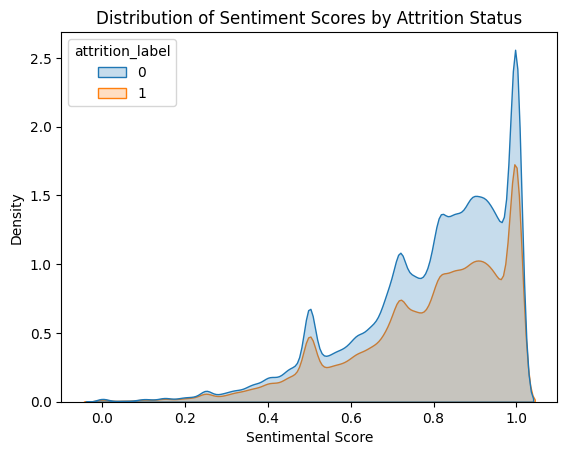

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=df_cleaned, x='sentimental_score', hue='attrition_label', fill=True)
plt.title('Distribution of Sentiment Scores by Attrition Status')
plt.xlabel('Sentimental Score')
plt.ylabel('Density')
plt.show()

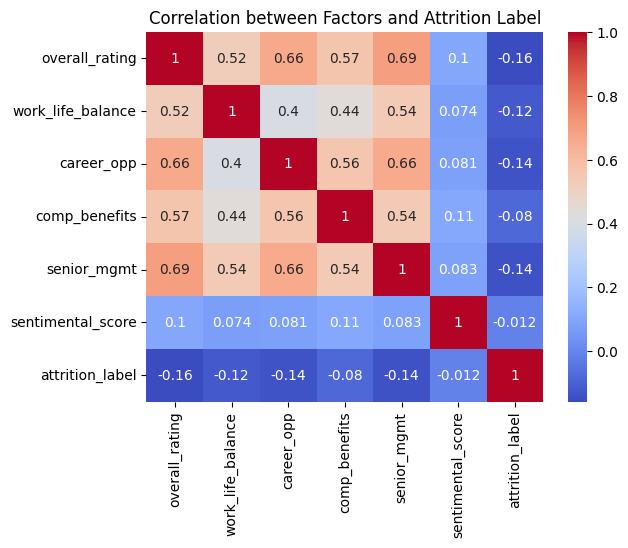

In [25]:
corr = df_cleaned[[
    'overall_rating', 'work_life_balance', 'career_opp', 'comp_benefits', 
    'senior_mgmt', 'sentimental_score', 'attrition_label'
]].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Factors and Attrition Label')
plt.show()

### Model Training: Advanced ML Approaches

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

#### Logistic Regression Model

🔹 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.78      0.71     90124
           1       0.56      0.40      0.46     63798

    accuracy                           0.62    153922
   macro avg       0.60      0.59      0.59    153922
weighted avg       0.61      0.62      0.61    153922

ROC-AUC: 0.6807983739897262

Confusion Matrix:
 [[70438 19686]
 [38596 25202]]


<Figure size 600x500 with 0 Axes>

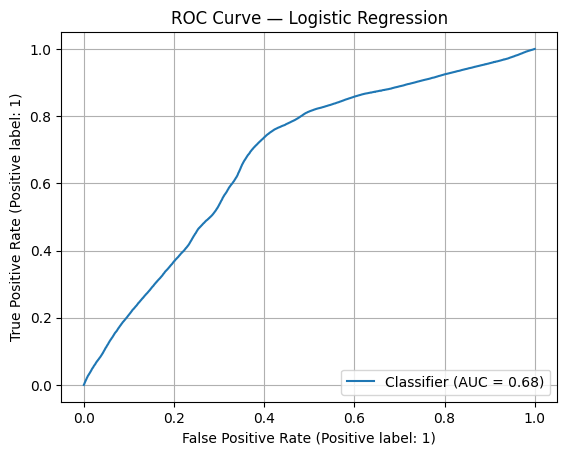

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test_scaled)
y_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("🔹 Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix:\n", cm_lr)

# ROC Curve
plt.figure(figsize=(6, 5))
RocCurveDisplay.from_predictions(y_test, y_proba_lr)
plt.title("ROC Curve — Logistic Regression")
plt.grid(True)
plt.show()

#### Improvement of the Logistic Regression Model

In [42]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn
!pip install -U imbalanced-learn

Found existing installation: scikit-learn 1.7.0
Uninstalling scikit-learn-1.7.0:
  Successfully uninstalled scikit-learn-1.7.0



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


##### Step 1: Handle Class Imbalance with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Reuse your scaled data if already done
# Otherwise, scale features again before SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts(normalize=True))
print("After SMOTE:", y_train_res.value_counts(normalize=True))

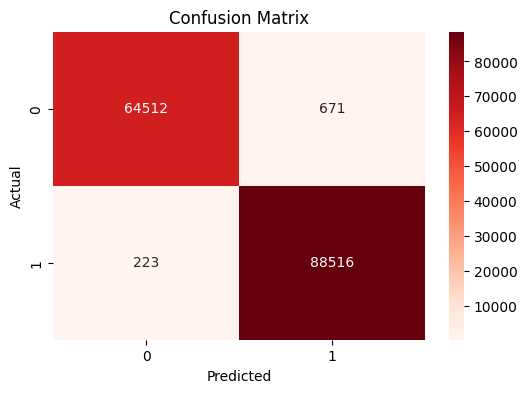

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns 

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)

# Visualize
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,  fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### Random Forest Model

In [37]:
# Random Forest & hyperparameter tuning
rf = RandomForestClassifier(random_state=42)
rf_grid = {'n_estimators': [200, 300], 'max_depth': [6, 12], 'min_samples_split': [2, 10]}
rf_cv = GridSearchCV(rf, rf_grid, cv=5, scoring='roc_auc', n_jobs=-1)
rf_cv.fit(X_train, y_train)
print(f"Best RF Params: {rf_cv.best_params_}")
rf_best = rf_cv.best_estimator_
y_pred_rf = rf_best.predict(X_test)
print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))
print('RF ROC-AUC:', roc_auc_score(y_test, rf_best.predict_proba(X_test)[:, 1]))

Best RF Params: {'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65183
           1       1.00      1.00      1.00     88739

    accuracy                           1.00    153922
   macro avg       1.00      1.00      1.00    153922
weighted avg       1.00      1.00      1.00    153922

RF ROC-AUC: 0.9999985591969436


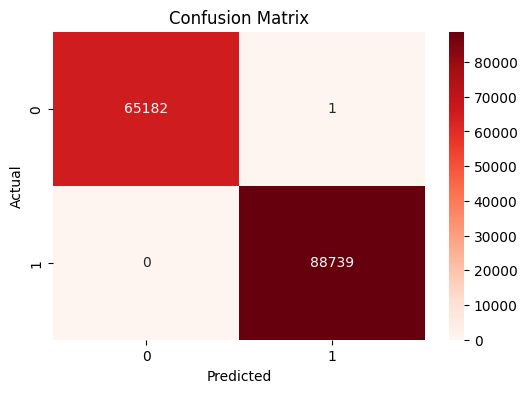

In [38]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Visualize
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,  fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### XGBoost Model

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

model_xgb = XGBClassifier(eval_metric='logloss')
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)
print("Confusion Matrix:") 
print(confusion_matrix(y_test, y_pred_xgb))
print()
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


Confusion Matrix:
[[48569 23894]
 [ 7502 73957]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.67      0.76     72463
           1       0.76      0.91      0.82     81459

    accuracy                           0.80    153922
   macro avg       0.81      0.79      0.79    153922
weighted avg       0.81      0.80      0.79    153922



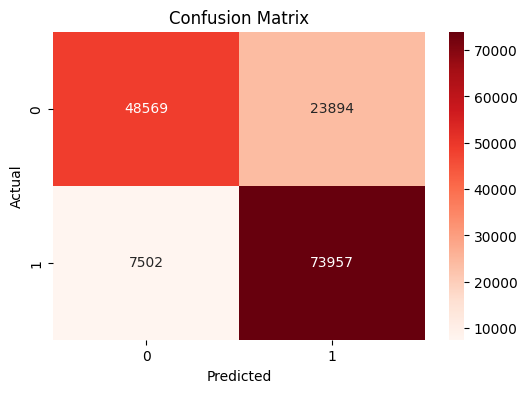

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Visualize
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,  fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

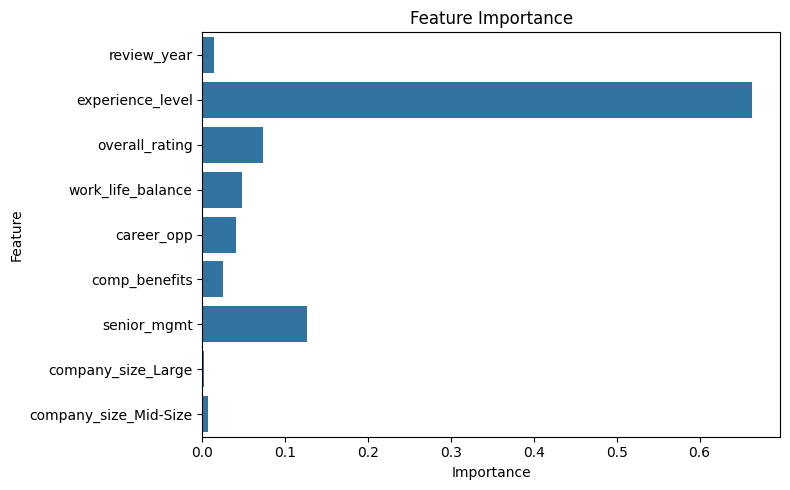

In [26]:
# Plot feature importances
importances = model_xgb.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#### Gradient Boosting Model

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)

y_pred_gb = model_gb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))
print()
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


Confusion Matrix:
[[49095 23368]
 [ 8688 72771]]

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.68      0.75     72463
           1       0.76      0.89      0.82     81459

    accuracy                           0.79    153922
   macro avg       0.80      0.79      0.79    153922
weighted avg       0.80      0.79      0.79    153922



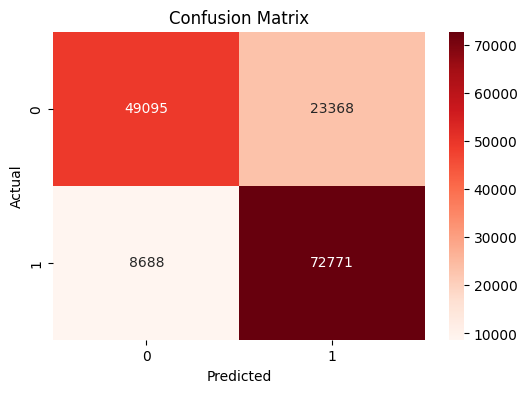

In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gb)

# Visualize
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,  fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### MLPClasssifier Model

In [29]:
from sklearn.neural_network import MLPClassifier

model_mlp = MLPClassifier(max_iter=1000)
model_mlp.fit(X_train, y_train)

y_pred_mlp = model_mlp.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))
print()
print("MLPClassifier Classification Report:")
print(classification_report(y_test, y_pred_mlp))

Confusion Matrix:
[[44234 28229]
 [22923 58536]]

MLPClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.61      0.63     72463
           1       0.67      0.72      0.70     81459

    accuracy                           0.67    153922
   macro avg       0.67      0.66      0.66    153922
weighted avg       0.67      0.67      0.67    153922



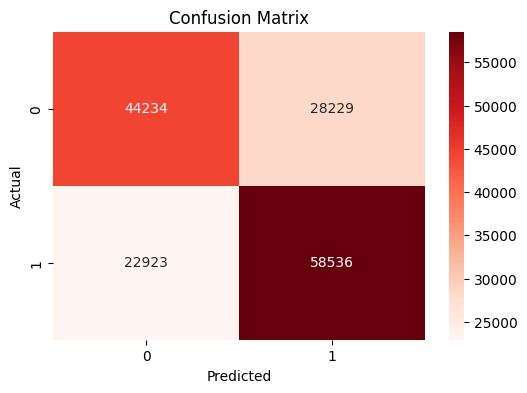

In [30]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_mlp)

# Visualize
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,  fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### Decision Tree Model

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10) 
dt_model.fit(X_train, y_train)

# Evaluate
y_pred_dt = dt_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print()
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Confusion Matrix:
[[48603 23860]
 [ 7679 73780]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.67      0.76     72463
           1       0.76      0.91      0.82     81459

    accuracy                           0.80    153922
   macro avg       0.81      0.79      0.79    153922
weighted avg       0.81      0.80      0.79    153922



After trying multiple models, I am finalizing this model because of its balance between predictive performance and interpretability. 

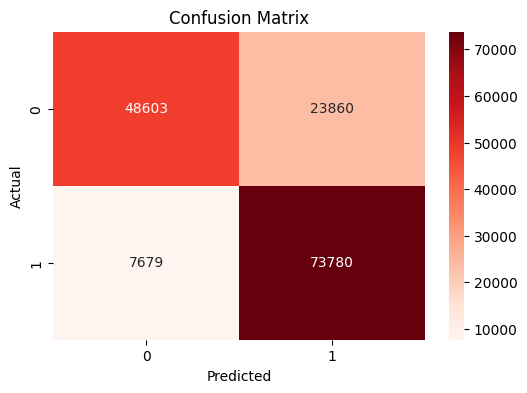

In [32]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Visualize
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,  fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

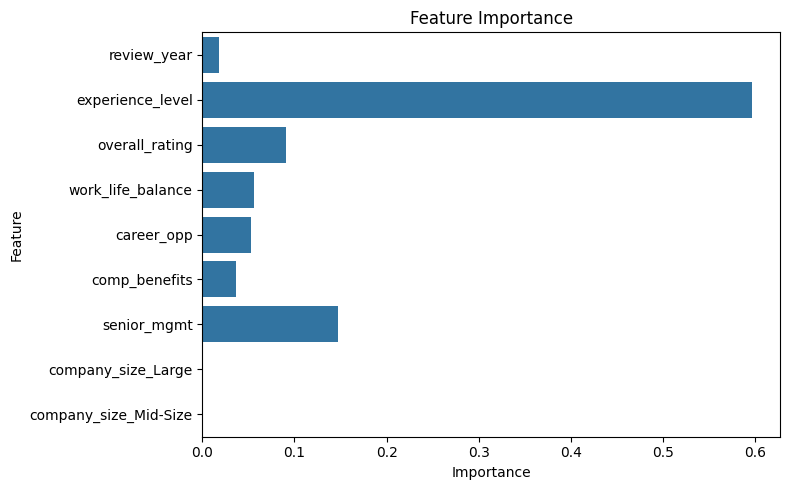

In [33]:
# Plot feature importances
importances = dt_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

'experience_level' was the most influential predictor of retention, followed by 'senior_mgmt' and 'overall_rating'. This suggests that more experienced employees are more likely to stay or leave depending on their satisfaction with senior management and their overall perception of the organization.

In [34]:
print(feature_names, importances)

Index(['review_year', 'experience_level', 'overall_rating',
       'work_life_balance', 'career_opp', 'comp_benefits', 'senior_mgmt',
       'company_size_Large', 'company_size_Mid-Size'],
      dtype='object') [1.76170508e-02 5.97326887e-01 9.10284206e-02 5.62445306e-02
 5.30899552e-02 3.62314420e-02 1.47710402e-01 2.71213021e-04
 4.80098807e-04]


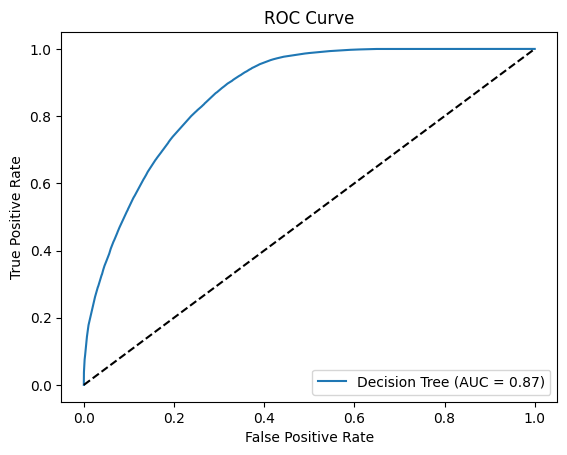

In [35]:
from sklearn.metrics import roc_curve, auc

y_probs = dt_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


The ROC curve demonstrates the model’s ability to distinguish between the two classes. The curve rises quickly toward the top-left corner, indicating a high true positive rate and a low false positive rate across various thresholds. The area under the curve (AUC) is 0.87, which confirms the model’s robustness in binary classification tasks.

In [36]:
# Predict only for current employees
current_employees = df[df['reviewer_status'] == 1].copy()
X_current = current_employees[features]

# Prediction for current employees
current_employees['dt_pred'] = dt_model.predict(X_current)
current_employees['dt_prob'] = dt_model.predict_proba(X_current)[:, 1]

current_employees[['id', 'dt_pred', 'dt_prob']].head(10)

,id,dt_pred,dt_prob
0,1,1,0.842040
1,2,0,0.495465
2,3,0,0.040964
3,4,1,0.836875
4,5,0,0.040964
5,6,1,0.544161
7,8,1,0.865554
10,11,0,0.040964
12,13,1,0.864865
14,15,1,0.865554


In [37]:
# Current Employees
print("Number of Current Employees:", len(current_employees))

# Current Employees Likely to Stay
staying_employees = current_employees[current_employees['dt_pred']==1]
print("\nNumber of current employees likely to stay in the companies:", len(staying_employees))

# Current Employees Likely to Leave 
leaving_employees = current_employees[current_employees['dt_pred']==0]
print("\nNumber of current employees likely to leave the companies:", len(leaving_employees))

Number of Current Employees: 450620

Number of current employees likely to stay in the companies: 369467

Number of current employees likely to leave the companies: 81153


In [42]:
staying_percentage = (len(staying_employees)/ len(current_employees))*100
leaving_percentage = (len(leaving_employees)/ len(current_employees))*100
print(f"{staying_percentage: .2f}% employees might stay in the companies &{leaving_percentage: .2f}% might leave.")

 81.99% employees might stay in the companies & 18.01% might leave.


#### Merge of multiple models

In [39]:
from sklearn.ensemble import VotingClassifier

# Initialize models
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
dtree = DecisionTreeClassifier(random_state=42)

# Create Voting Classifier 
voting_clf = VotingClassifier(
    estimators=[('xgb', xgb),('gradient_boosting', gb_model), ('dt', dtree)],
    voting='soft'
)

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Predict on test data
y_pred_voting_clf = voting_clf.predict(X_test)

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_voting_clf))

print("\nVoting Classifier Classification Report:")
print(classification_report(y_test, y_pred_voting_clf))


Confusion Matrix:
[[48989 23474]
 [ 8617 72842]]

Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.68      0.75     72463
           1       0.76      0.89      0.82     81459

    accuracy                           0.79    153922
   macro avg       0.80      0.79      0.79    153922
weighted avg       0.80      0.79      0.79    153922

